# CogniSafe EEG - EDA and Visualization

This notebook loads the EEG dataset, performs basic exploratory data analysis, and visualizes sample EEG traces.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Load Data

In [25]:
DATA_PATH = "../EEG_data_set.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {DATA_PATH}. Please check the path.")

Dataset loaded successfully.


In [26]:
df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,status
0,116.99375,41.09375,66.69375,-64.50625,-126.40625,8.39375,22.49375,42.19375,53.29375,4.49375,2.49375,73.79375,129.29375,0.09375,-124.90625,-245.50625,1
1,115.93125,38.63125,64.73125,-64.66875,-125.26875,8.73125,27.03125,43.23125,57.53125,11.13125,2.33125,72.23125,125.73125,-5.46875,-123.06875,-248.76875,1
2,115.72500,38.32500,66.02500,-62.67500,-135.37500,9.02500,29.42500,47.12500,49.92500,24.42500,1.22500,72.92500,123.22500,-3.07500,-129.97500,-246.27500,1
3,120.15625,40.75625,71.05625,-59.54375,-148.34375,12.15625,32.25625,49.05625,41.05625,12.75625,1.85625,73.55625,128.65625,-0.14375,-133.24375,-242.04375,1
4,119.50000,39.50000,71.30000,-59.20000,-125.50000,14.80000,28.50000,48.80000,42.20000,-1.20000,1.40000,70.30000,116.10000,3.40000,-129.00000,-240.90000,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848640 entries, 0 to 848639
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     848640 non-null  float64
 1   Fp2     848640 non-null  float64
 2   F7      848640 non-null  float64
 3   F3      848640 non-null  float64
 4   Fz      848640 non-null  float64
 5   F4      848640 non-null  float64
 6   F8      848640 non-null  float64
 7   T3      848640 non-null  float64
 8   C3      848640 non-null  float64
 9   Cz      848640 non-null  float64
 10  C4      848640 non-null  float64
 11  T4      848640 non-null  float64
 12  T5      848640 non-null  float64
 13  P3      848640 non-null  float64
 14  Pz      848640 non-null  float64
 15  P4      848640 non-null  float64
 16  status  848640 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 110.1 MB


In [28]:
df.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,status
count,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.00000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000,848640.000000
mean,9.197634,23.204037,-11.428283,4.300583,-26.751948,-19.904077,-11.155309,-21.950993,18.05179,18.132288,16.903650,17.301845,-13.820743,-4.300905,39.719552,-37.499122,0.603318
std,107.877150,74.794207,60.968966,50.977283,77.433634,52.194458,147.858085,75.109347,36.53587,84.863804,65.831297,43.450596,63.844198,41.639673,59.709989,82.382886,0.489209
min,-698.175000,-555.575000,-334.400000,-460.775000,-434.975000,-572.075000,-1000.331250,-1006.575000,-465.37500,-163.743750,-451.425000,-451.675000,-726.368750,-487.075000,-385.775000,-646.412500,0.000000
25%,-25.956250,-10.381250,-38.181250,-19.387500,-42.243750,-39.475000,-22.768750,-55.868750,-2.60625,-11.087500,-9.300000,-4.918750,-29.018750,-21.412500,4.906250,-36.906250,0.000000
50%,-11.800000,2.256250,-7.100000,-1.056250,-13.931250,-18.025000,2.762500,-8.693750,12.91875,1.765625,7.187500,6.781250,-3.400000,-6.225000,24.062500,-12.568750,1.000000
75%,23.268750,35.487500,20.868750,19.387500,5.645313,7.362500,29.075000,13.743750,29.70000,24.175000,39.981250,23.875000,11.912500,11.425000,72.312500,4.425000,1.000000
max,7077.325000,376.937500,409.137500,638.925000,533.962500,227.187500,1152.418750,281.562500,346.96875,805.356250,343.512500,358.931250,244.687500,214.700000,595.250000,115.893750,1.000000


## 2. Check Label Distribution

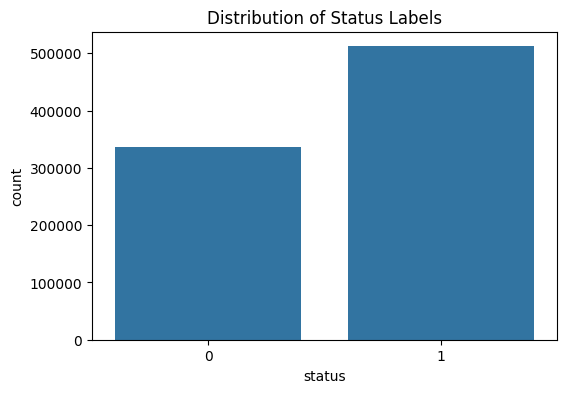

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Distribution of Status Labels')
plt.show()

## 3. Visualize EEG Traces
We will plot a few seconds of data for a random subject (or just a chunk of rows, assuming rows are time-ordered).

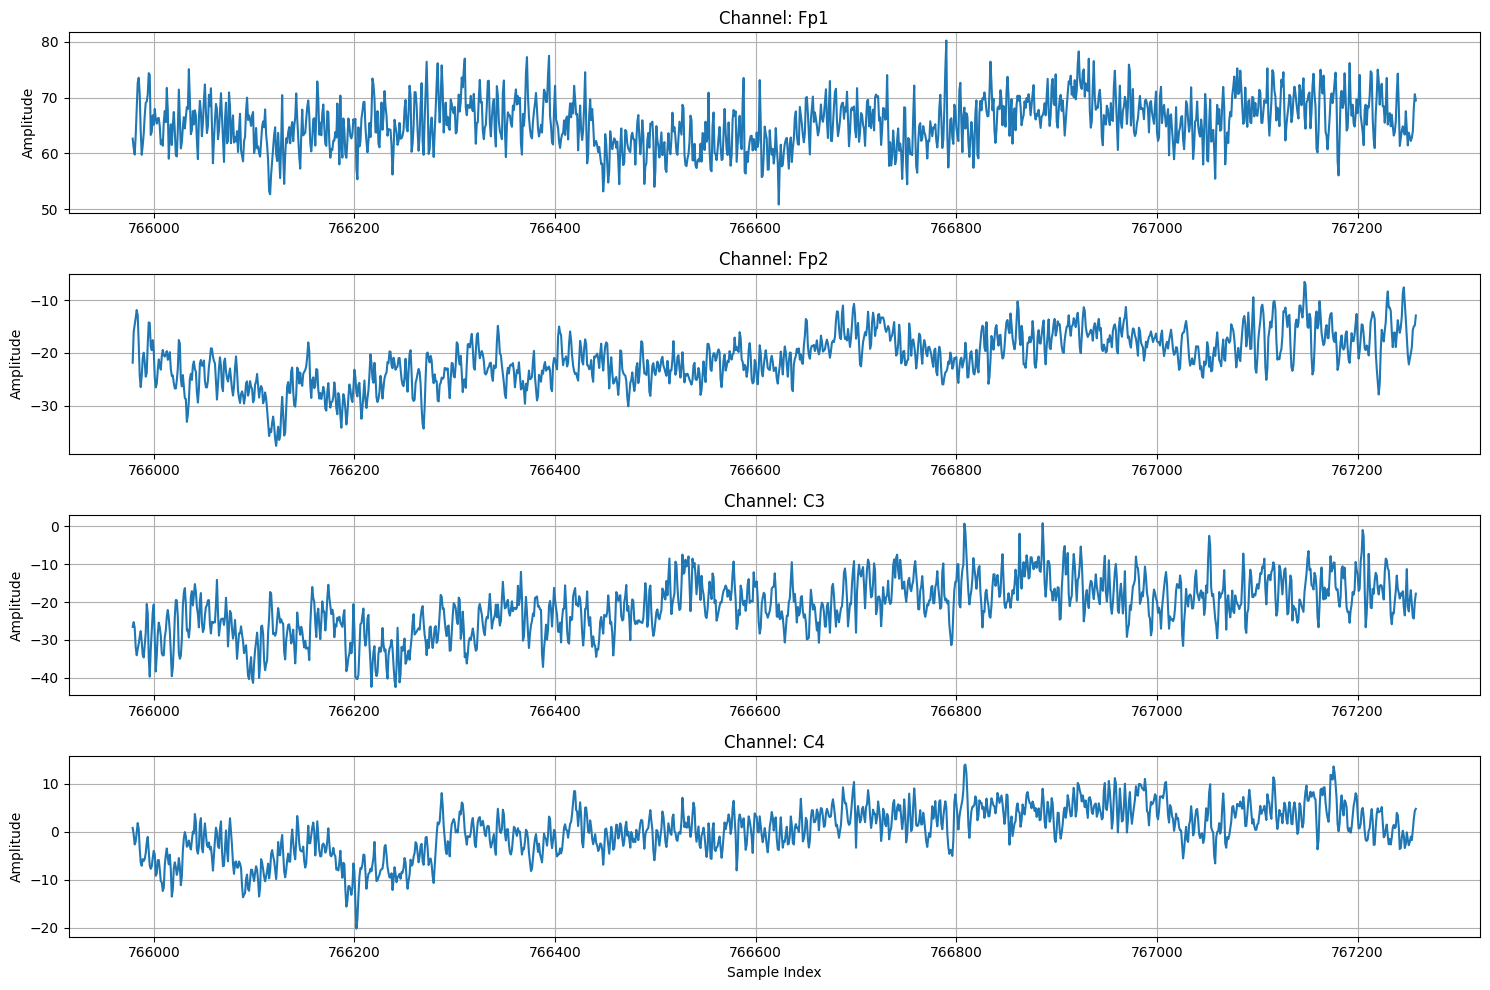

In [30]:
# Assuming 256 Hz sampling rate
fs = 256
n_seconds = 5
n_samples = fs * n_seconds

# Select a random start index
start_idx = np.random.randint(0, len(df) - n_samples)
segment = df.iloc[start_idx : start_idx + n_samples]

channels_to_plot = ['Fp1', 'Fp2', 'C3', 'C4', ]

plt.figure(figsize=(15, 10))
for i, channel in enumerate(channels_to_plot):
    plt.subplot(len(channels_to_plot), 1, i + 1)
    plt.plot(segment.index, segment[channel])
    plt.title(f'Channel: {channel}')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.xlabel('Sample Index')
plt.tight_layout()
plt.show()

## 4. Correlation Heatmap

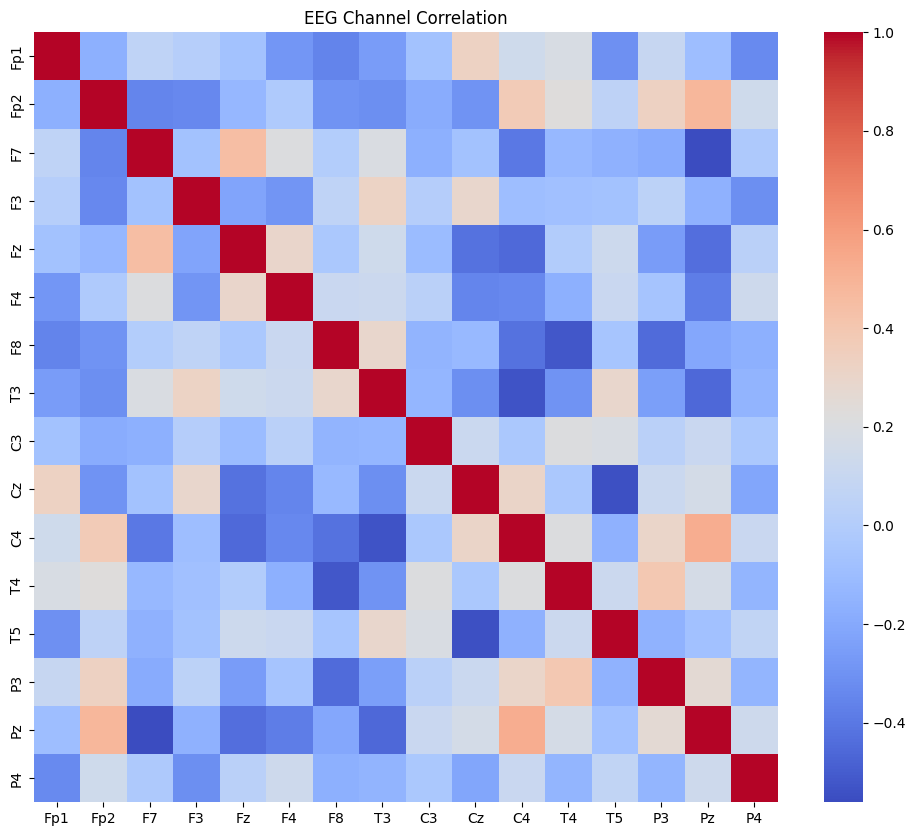

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('status', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title('EEG Channel Correlation')
plt.show()